In [1]:
import tensorflow as tf
from keras_preprocessing.image import load_img, img_to_array, array_to_img 
import numpy as np 
import matplotlib.pyplot as plt 


# Load the saved model
model = tf.keras.models.load_model('./img_model_X2.best.hdf5')

2023-05-18 17:49:58.858002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 17:50:02.763624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
labels_inv = {'Cargo': 0,
              'Military': 1,
              'Carrier': 2,
              'Cruise': 3,
              'Tankers': 4}
labels = {v:k for k,v in labels_inv.items()}
labels

{0: 'Cargo', 1: 'Military', 2: 'Carrier', 3: 'Cruise', 4: 'Tankers'}

In [3]:
def predict(path,model) :
    img = tf.keras.preprocessing.image.load_img(path, target_size=(224,224), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    pred = model.predict(np.array([img]))
    plt.imshow(img)
    pred_label = np.argsort(pred)
    for i in pred_label[0][-1:-3:-1] :
        print(f"{labels[i]} Ship : {pred[0][i]*100:0.2f} %")

1/1 [==============================] - 0s 105ms/step
Military Ship : 89.40 %
Cargo Ship : 4.84 %


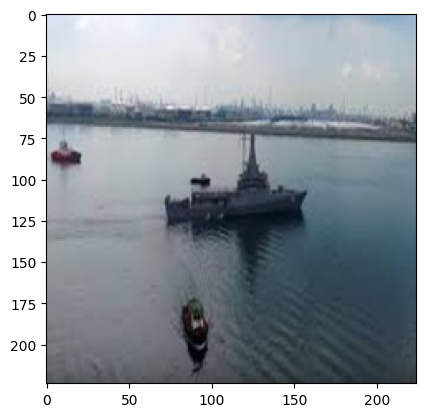

In [12]:
predict("../input/download/lmv.jpeg",model) 

In [6]:
model_VGG = tf.keras.models.load_model('./model_VGG16_best.h5')

1/1 [==============================] - 0s 432ms/step
Carrier Ship : 96.65 %
Cargo Ship : 1.44 %


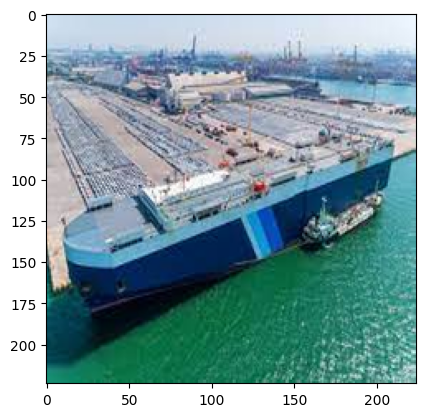

In [7]:
predict("../input/download/roll roll.jpeg",model_VGG) 